In [ ]:
# basics
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import random
from functools import partial
import networkx as nx
# penny
import pennylane as qml
from pennylane.transforms import *
from pennylane.math import fidelity_statevector as fidelity_penny
# qiskit
from qiskit import QuantumCircuit, transpile
from qiskit.circuit import Gate
from qiskit_aer import Aer, AerSimulator
from qiskit.visualization import plot_circuit_layout, circuit_drawer
from qiskit.circuit.library import UnitaryGate
from qiskit.quantum_info import Statevector
from qiskit.quantum_info import state_fidelity as fidelity_qiskit
from math import pi
import copy
# self-developed
from transpilation_util import *
from penny_to_graph import Penny_to_Graph


In [495]:
[ds] = qml.data.load("ketgpt")

In [496]:
random.seed(42)
# seed = random.randint(0,1000)
seed = 0

def summary_penny(circuit):
    obj = qml.specs(circuit)()['resources']
    temp = qml.specs(circuit)()['resources'].gate_types # dict
    summary =  [obj.num_wires, obj.num_gates, obj.gate_sizes[1], temp['CZ']+temp['CNOT'], temp['QubitUnitary'], obj.depth]
    df = pd.DataFrame(summary, index=['num_qubit', 'num_gate', 'num_1q_gate', 'num_2q_gate', 'unitary','depth'])
    # df = df.T
    print(df)

In [497]:
@qml.qnode(qml.device('default.qubit'))
def circuit(): # 0 to 99
    for op in ds.circuits[seed]:
        qml.apply(op)
    return qml.state()

print(summary_penny(circuit))

               0
num_qubit     13
num_gate     205
num_1q_gate  116
num_2q_gate   25
unitary       64
depth         72
None


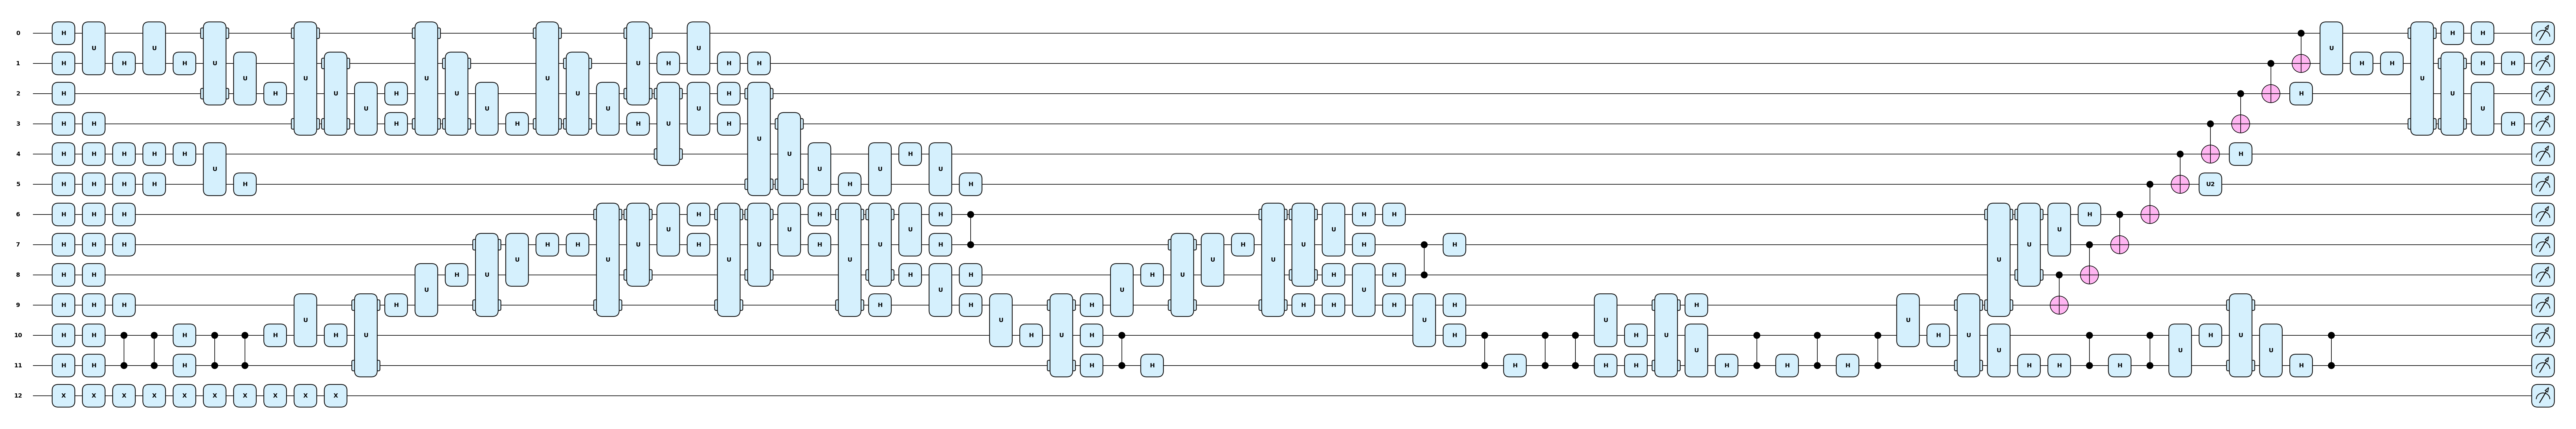

In [498]:
fig, axs = qml.draw_mpl(circuit, style='pennylane')()
plt.show()

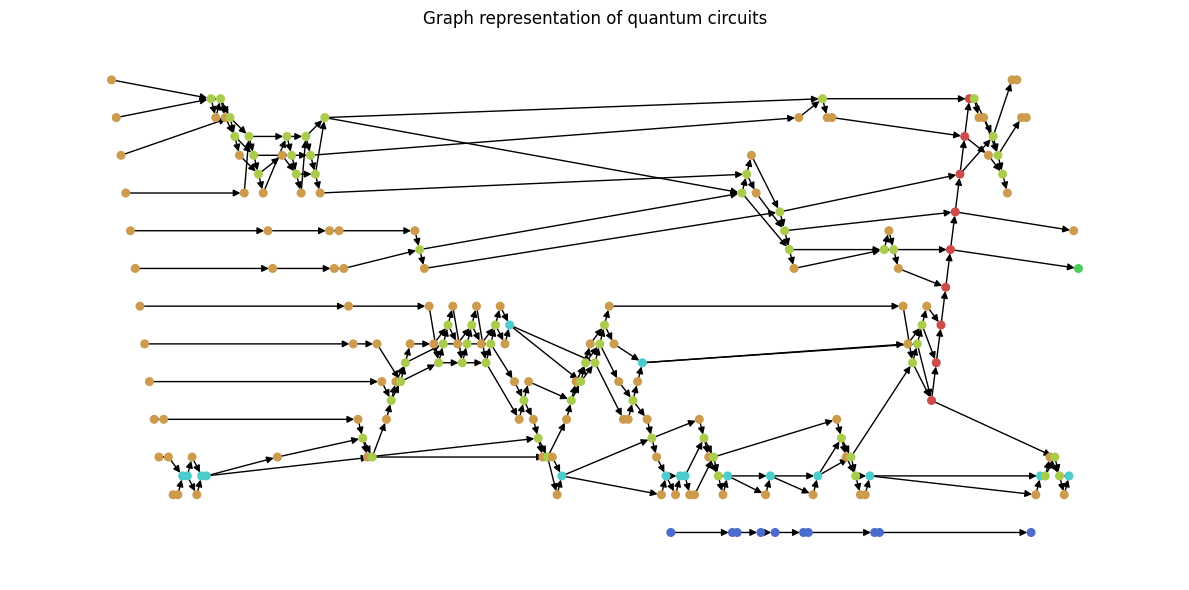

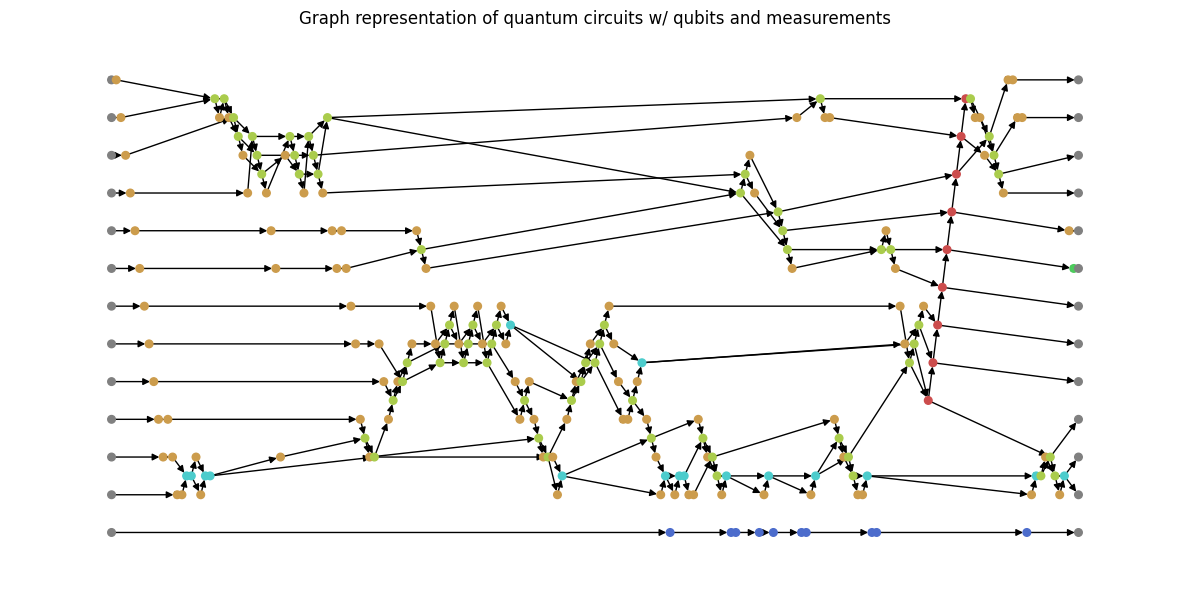

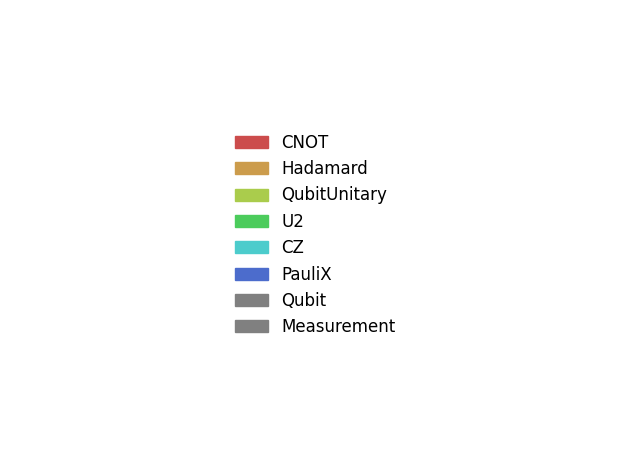

In [510]:
my_pg = Penny_to_Graph(circuit)
G_aug = my_pg.G_aug
G = my_pg.G
my_pg.show_graph()
my_pg.show_aug_graph()
my_pg.show_legend()